ainda em construção....

### **Análise do setor de aviação: Boeing vs. Airbus vs. Embraer**



##### Carregar as bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

##### Criar uma função que baixa os preços das ações da Embraer, armazena e retorna ele em um dataframe

In [2]:
def dados_preços():
    # Definir o intervalo de datas: de 01/01/2019 até 27/01/2024.
    start = dt.datetime(2017, 1, 1)
    end = dt.datetime(2024, 4, 27 )

    # Lista de tickers das empresas
    tickers = ['EMBR3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Resetar o índice para incluir a coluna de datas no DataFrame
    df.reset_index(inplace=True)

    return df

#### Armazenar os dados obtidos e armazená-lo no dataframe

In [3]:
# Obter os dados
df = dados_preços()

[*********************100%%**********************]  1 of 1 completed


#### Criar um gráfico de dispersão com linhas padrão com os dados

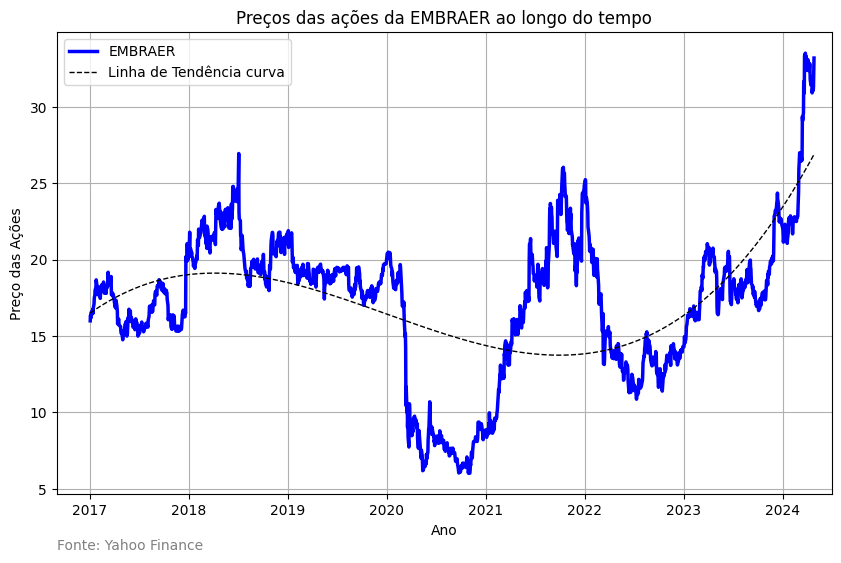

In [9]:
# Criar uma coluna de data a partir da coluna 'Date'
df['data'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
plt.plot(df.index, df['EMBR3'], label='EMBRAER', color='blue', linewidth=2.5)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['EMBR3'], 3)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência curva', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Preços das ações da EMBRAER ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2024-07-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-09-01'), 1, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()

#### Criar um gráfico de dispersão puro com os dados e tacar uma linha de tendência

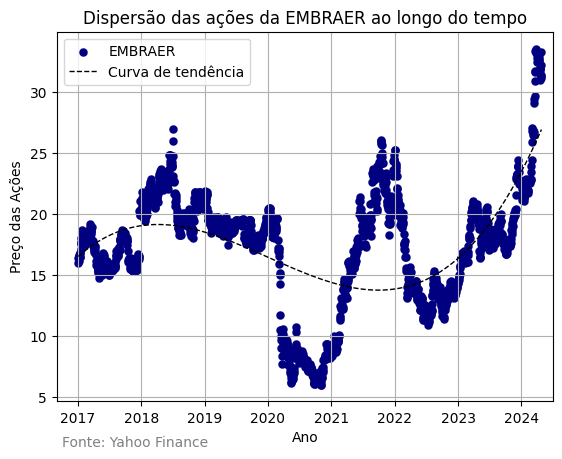

In [27]:
# Plotar os dados sobre os preços das ações da WEG
plt.scatter(df.index, df['EMBR3'], label='EMBRAER', color='navy', linewidth=0.09)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['EMBR3'], 3)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Dispersão das ações da EMBRAER ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2024-07-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-10-01'), 1, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()

#### Criar um histograma de dispersão dos preços de forma a visualizar a distribuição dele ao longo do tempo

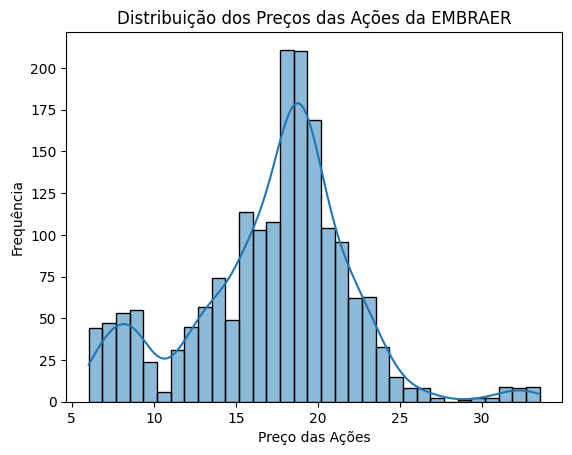

In [21]:
sns.histplot(df['EMBR3'], kde=True)
plt.title('Distribuição dos Preços das Ações da EMBRAER')
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')
plt.show()

Perceba que a distribuição dos preços mais comum está por volta de 15 a 20 cada ação

##### Agora quero plotar o gráfico para visualizar o comportamento dos preços das ações em diferentes anos. Aqui quero examinar as tendências de preços ao longo dos anos, ou seja, em que ano ele tendeu a subir ou cair.

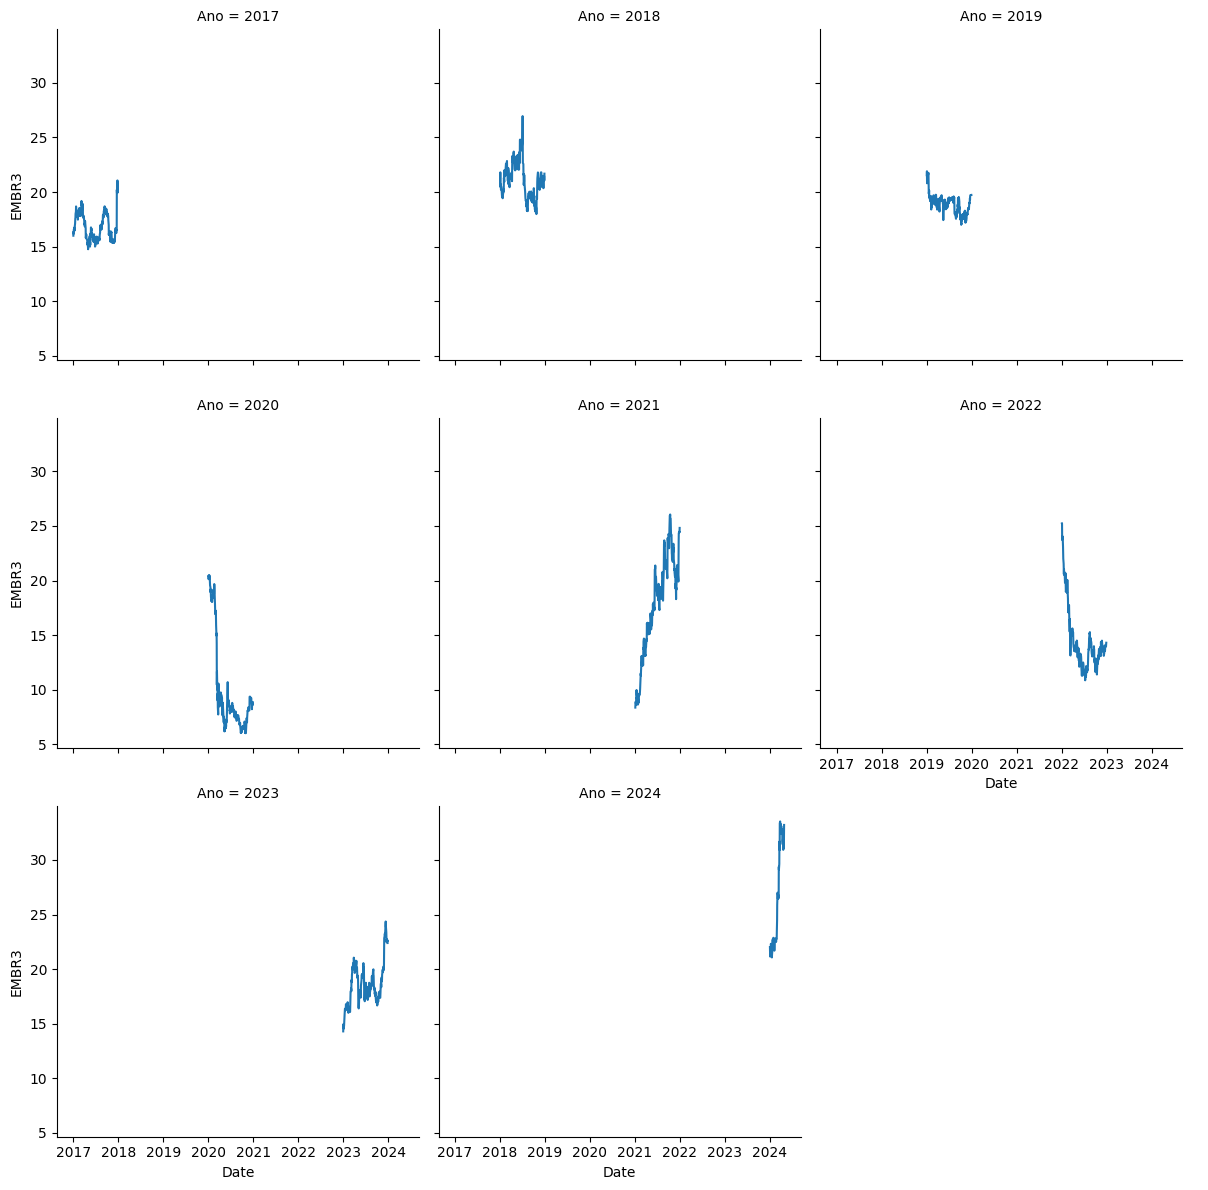

In [69]:
#Visualizar o comportamento dos preços em diferentes anos

#Coloco a data em anos apenas
df['Ano'] = df.index.year

#Crio uma variável, g, onde armazeno um gráfico que mostra o comportamento dos preços em vários anos de forma individual para cada ano
g = sns.FacetGrid(df, col='Ano', col_wrap=3, height=4)

#Configuro o que estará escrito nos eixos:
g.map(sns.lineplot, 'Date', 'EMBR3')
g.add_legend()
plt.show()


Analisando cada ano individualmente temos o seguinte:

*   2017:  estabilidade + leve subida
*   2018: manutenção de uma leve subida + leve queda e estabilidade
*   2019: manutenção de estabilidade
*   2020: forte queda (ano da pandemia)
*   2021: recuperação das perdas (a tal recuperação em V)
*   2022: queda (bem menos intensa que na pandemia), mas ainda assim uma boa queda
*   2023: recuperação daquela queda do ano anterior
*   2024: forte subida (problemas na Boeing==> enfraquecimento da concorrência e potencial crescimento futuro)







#### Vou baixar os dados das concorrentes da Embraer (Airbus e Boeing)



In [39]:
# Lista de tickers
tickers = ['BA', 'EADSY']

#Dicionário empresas:
empresas = {'BA': 'Boeing', 'EADSY': 'Airbus'}

#Definindo cores: crio um dicionário:
cores ={'BA':'indigo', 'EADSY':'darkgreen'}

# Definir intervalo de datas
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2024, 4, 27)

In [40]:
def download_stock_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
    return data

# Definir intervalo de datas
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2024, 4, 27)

# Lista de tickers
tickers = ['BA', 'EADSY']

# Baixar dados
stock_data = download_stock_data(tickers, start_date, end_date)

print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                    BA      EADSY
Date                             
2017-01-03  156.970001  16.520000
2017-01-04  158.619995  16.719999
2017-01-05  158.710007  17.090000
2017-01-06  159.100006  17.080000
2017-01-09  158.320007  17.170000


In [42]:
def preços_concorrentes(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
    return data

In [43]:
# Baixar os dados das ações da Airbus e da Boeing
stock_data = preços_concorrentes(tickers, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


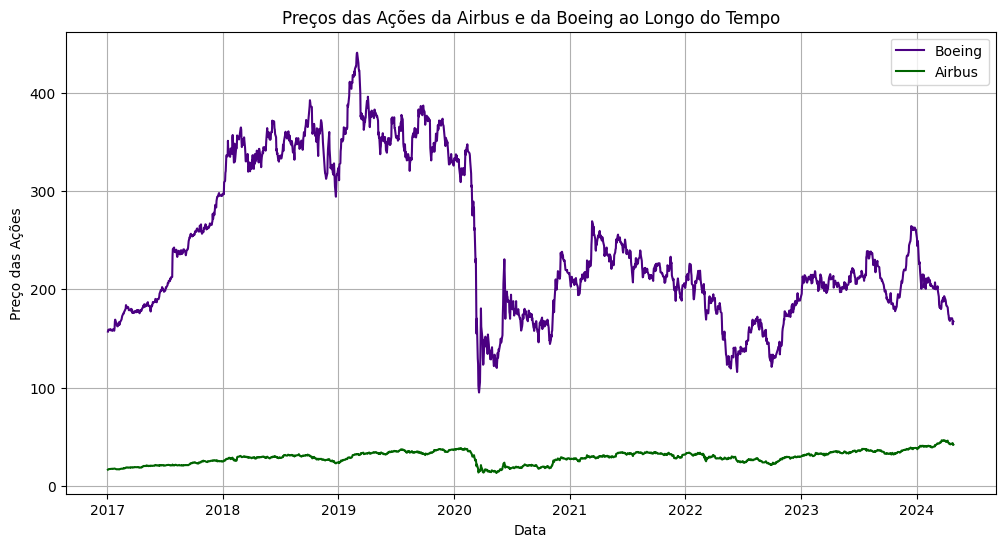

In [44]:
# Plotar os preços das ações da Airbus e da Boeing:
plt.figure(figsize=(12, 6))

#Crio um loop para desenhar os dois gráficos de uma vez só:
for ticker in tickers:
    plt.plot(stock_data.index, stock_data[ticker], label=empresas[ticker], color = cores[ticker])
plt.title('Preços das Ações da Airbus e da Boeing ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid()
plt.show()


##### Vou analisar os dois individualmente agora via aquele gráfico FacetGrid (Para analisar o comportamento anual)

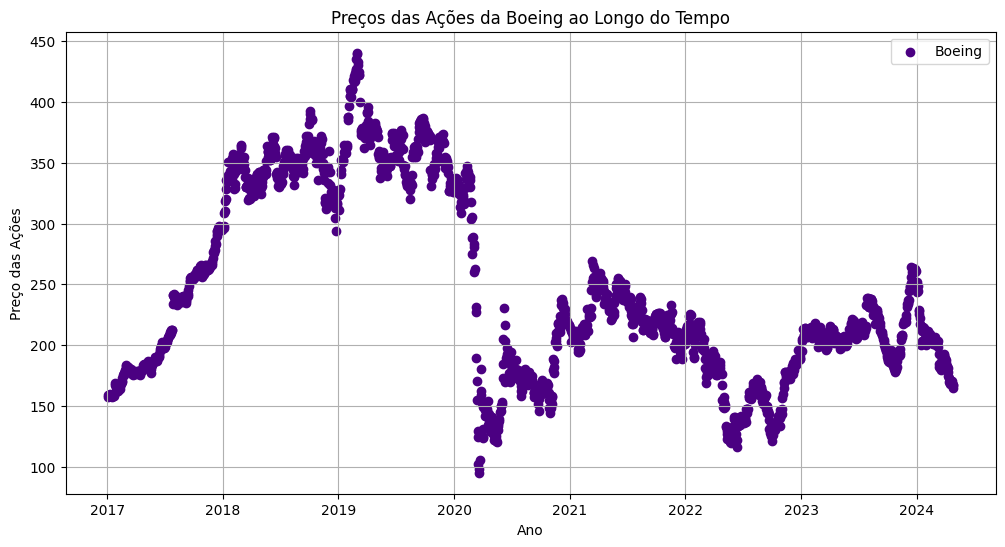

In [73]:
# Plotar os preços das ações da Boeing:

#Crio uma figura onde ficará o gráfico
plt.figure(figsize=(12, 6))

#Plotar os dados de dispersão de preços da Boeing:
plt.scatter(stock_data.index, stock_data['BA'], label=empresas['BA'], color = cores['BA'], )
plt.title('Preços das Ações da Boeing ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid()
plt.show()

In [67]:
stock_data['Date'] = stock_data.index.year
print(stock_data.index.year)

Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Date', length=1841)


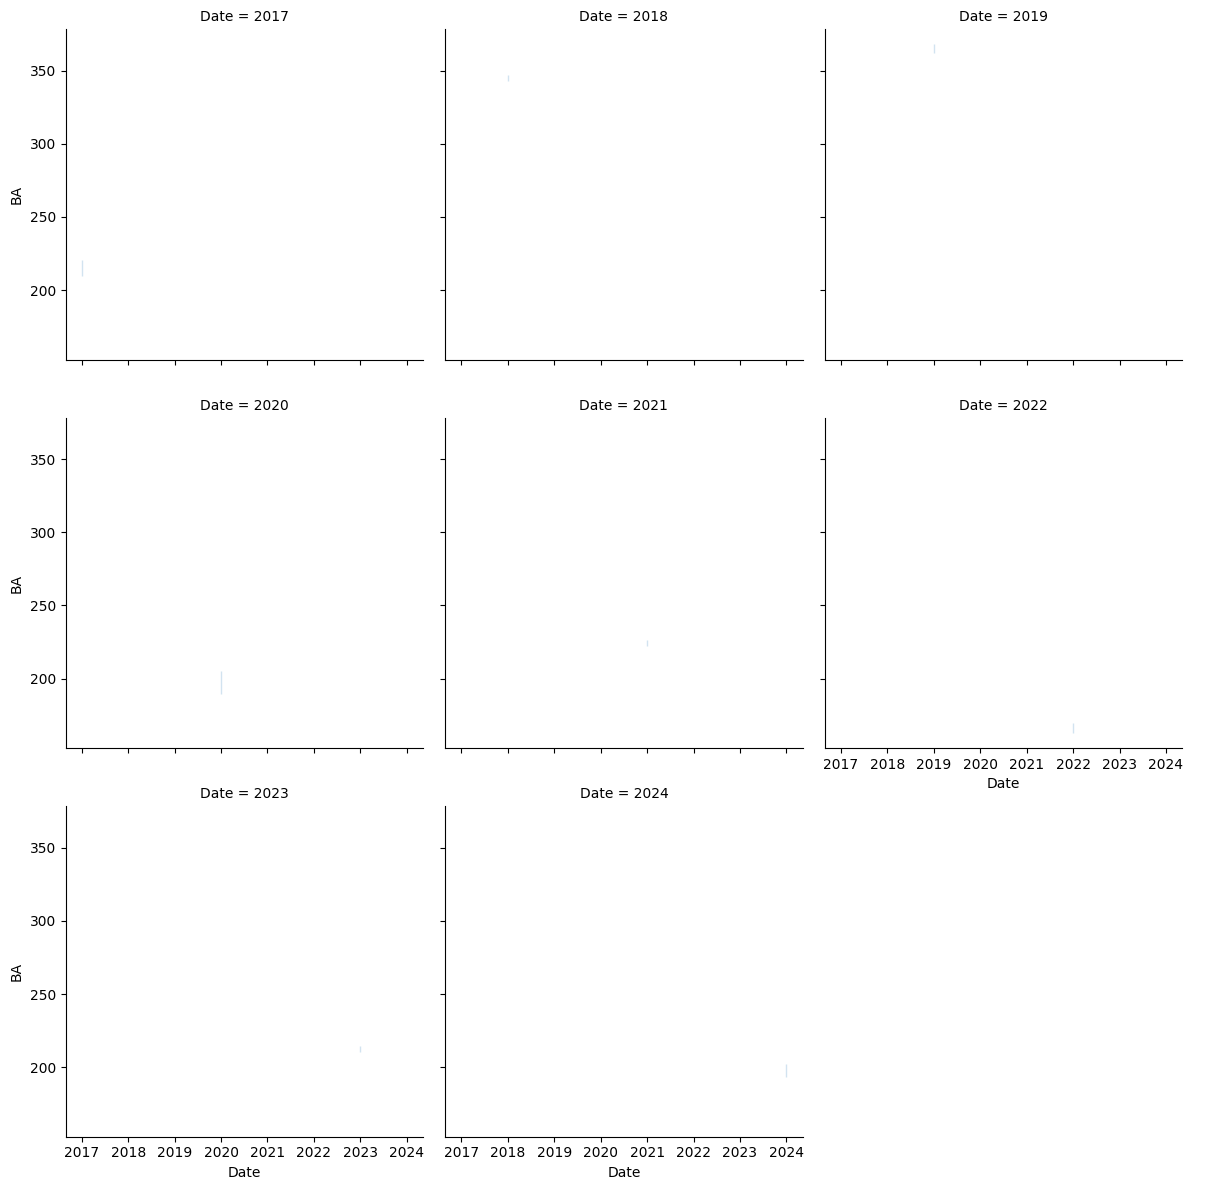

In [77]:
b = sns.FacetGrid(stock_data, col='Date', col_wrap=3, height=4)
b.map(sns.lineplot, 'Date', 'BA')
b.add_legend()
plt.show()

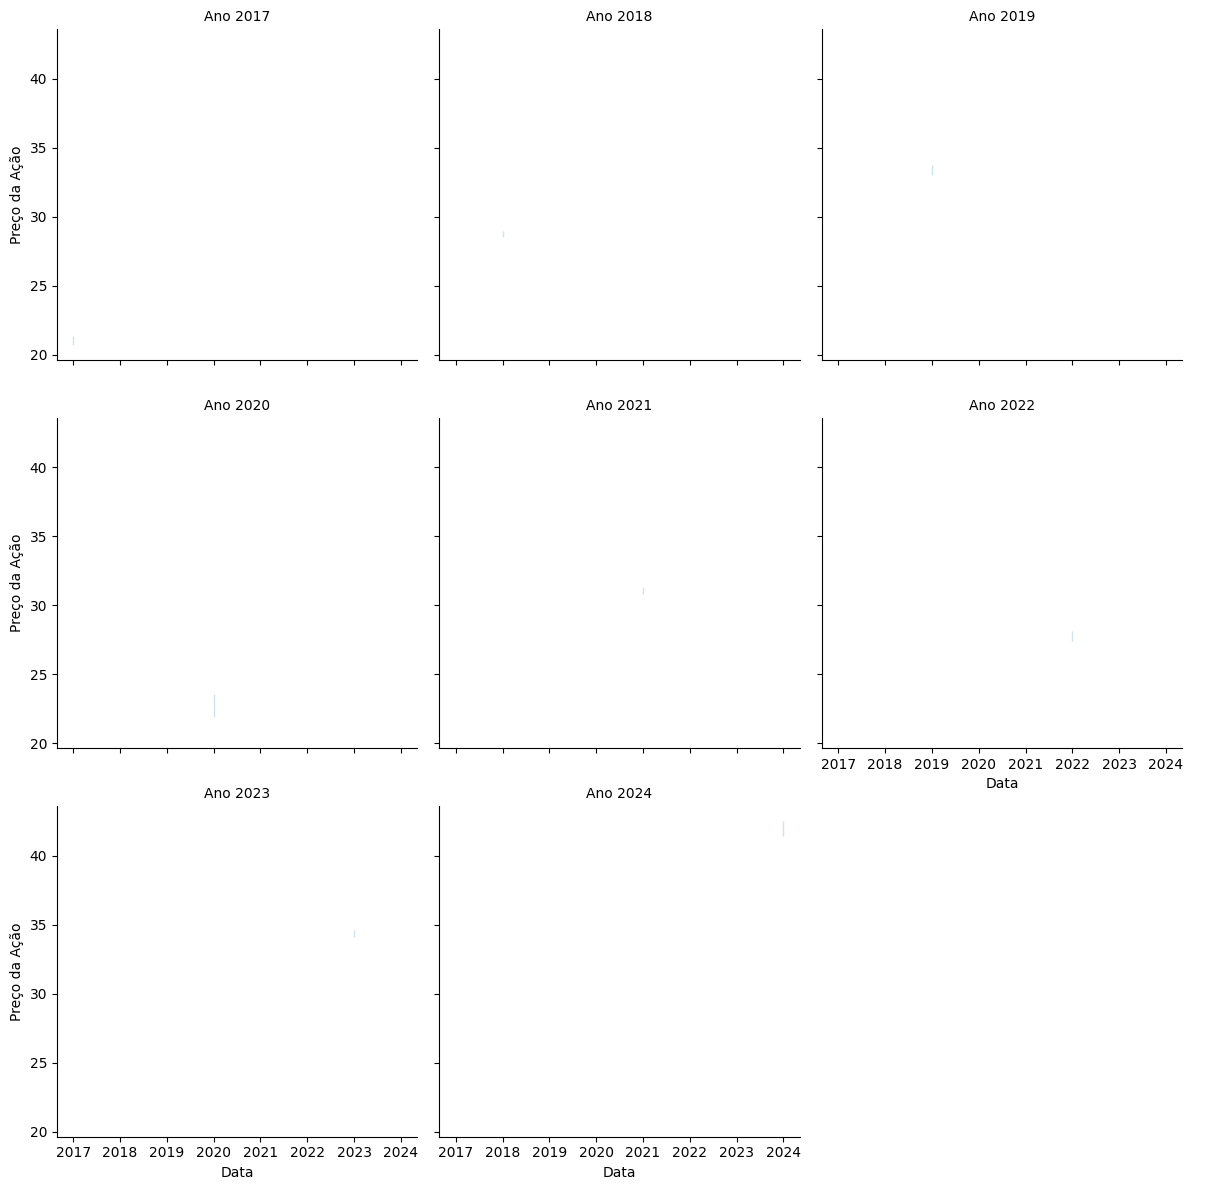

In [64]:
# Visualizar o comportamento dos preços da Boeing em diferentes anos
stock_data['Year'] = stock_data.index.year
b = sns.FacetGrid(stock_data, col='Year', col_wrap=3, height=4)
b.map(sns.lineplot, 'Date', 'EADSY')
b.set_axis_labels('Data', 'Preço da Ação')
b.set_titles('Ano {col_name}')
b.add_legend()
plt.show()